<a href="https://colab.research.google.com/github/tz01x/data_mining_examples/blob/main/Correlation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 


In [ ]:
data = [
    ['Nissan', 'Stanza', 1991, 138, 4, 'MANUAL', 'sedan', 2000],
    ['Hyundai', 'Sonata', 2017, None, 4, 'AUTOMATIC', 'Sedan', 27150],
    ['Lotus', 'Elise', 2010, 218, 4, 'MANUAL', 'convertible', 54990],
    ['GMC', 'Acadia',  2017, 194, 4, 'AUTOMATIC', '4dr SUV', 34450],
    ['Nissan', 'Frontier', 2017, 261, 6, 'MANUAL', 'Pickup', 32340],
]
columns = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle_Style', 'MSRP'
]
df = pd.DataFrame(data, columns=columns)


In [ ]:
df.head()

# **Contingency Table showing correlation between Model and transmission type status.**

In [ ]:

data_crosstab = pd.crosstab(df['Model'],
                            df['Transmission Type'], 
                               margins = False)
print(data_crosstab)


Transmission Type  AUTOMATIC  MANUAL
Model                               
Acadia                     1       0
Elise                      0       1
Frontier                   0       1
Sonata                     1       0
Stanza                     0       1


pandas.core.frame.DataFrame

In [ ]:
print(data_crosstab.index) # rows index 
print(data_crosstab.columns) # column index

Index(['Acadia', 'Elise', 'Frontier', 'Sonata', 'Stanza'], dtype='object', name='Model')
Index(['AUTOMATIC', 'MANUAL'], dtype='object', name='Transmission Type')


# **χ^2 Correlation Test for Nominal Data**

In [3]:

# arr=data_crosstab.to_numpy()
# if u have Contingency Table already then replace the bellow list in the  
mylist=[[250,200],[50,1000]] #row major 
arr=np.array(mylist)
# arr.shape==(5,2)
arr

array([[ 250,  200],
       [  50, 1000]])

In [4]:

sp=arr.shape
newarr=np.zeros((sp[0]+1,sp[1]+1))
newarr[0:-1,0:-1]=arr 
# print("new array\n",newarr)
for r in range(newarr.shape[0]):
  newarr[r,-1]=np.sum(newarr[r,0:-1])
for c in range(newarr.shape[1]):
  newarr[-1,c]=np.sum(newarr[0:-1,c])
print("programable Contingency Table\n", newarr)

programable Contingency Table
 [[ 250.  200.  450.]
 [  50. 1000. 1050.]
 [ 300. 1200. 1500.]]


expected frequency of (Ai ,Bj), which can be computed 


---


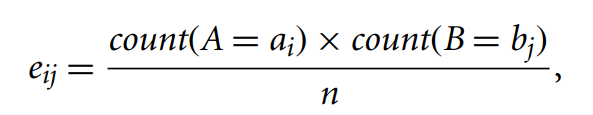


In [8]:
expected_f=np.zeros(arr.shape)
i,j = arr.shape
print("Expected frequency")
for ii in range(i):
  for jj in range(j):
    expected_f[ii,jj]=(newarr[-1,jj]*newarr[ii,-1])/newarr[-1,-1]
    print(f"e{ii}{jj}={newarr[-1,jj]}*{newarr[ii,-1]}/{newarr[-1,-1]}")

print()
print(expected_f)
x2=0
print("\n\nx2= ",end="")
for ii in range(i):
  for jj in range(j):
    x2=x2+((arr[ii,jj]-expected_f[ii,jj])**2/expected_f[ii,jj])
    print(f'({arr[ii,jj]}-{expected_f[ii,jj]})^2/{expected_f[ii,jj]} ',end="+")

print("\nx2 =",x2)

Expected frequency
e00=300.0*450.0/1500.0
e01=1200.0*450.0/1500.0
e10=300.0*1050.0/1500.0
e11=1200.0*1050.0/1500.0

[[ 90. 360.]
 [210. 840.]]


x2= (250-90.0)^2/90.0 +(200-360.0)^2/360.0 +(50-210.0)^2/210.0 +(1000-840.0)^2/840.0 +
x2 = 507.93650793650795


# **Correlation Coefficient for Numeric Data**




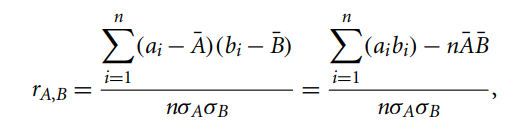

* A¯ and B¯ are the respective mean values of A and B,
* σA and σB are the respective standard deviations of A and B

* n is the number of tuples/rows

* ai and bi are the respective values of A and B in tuple/row number  i

In [10]:
A=[5,8,25,6,9,2]
B=[6,9,26,7,10,5]


In [11]:
import numpy as np 
a=np.array(A)
b=np.array(B)


In [14]:
stand_devi_a=a.std() #  standard deviation
mean_a=a.mean() 
stand_devi_b=b.std() #  standard deviation
mean_b=b.mean() 
n=a.shape[0]


In [15]:
sum=0
nAB=(n*mean_a*mean_b)
for i in range(n):
  sum+=((a[i]*b[i])-nAB)

rAB=(sum)/(n*stand_devi_a*stand_devi_b)

print(rAB)


-8.08708185621764


* rA,B < 0(negatively correlated)  → uA,dB or dA,uB ;u=increase , d=decrease
* rA,B > 0(positively correlated) → uA,uB
* rA,B ==0 → independent (there is no correlation between them)
